### Lineární regrese jedné proměnné

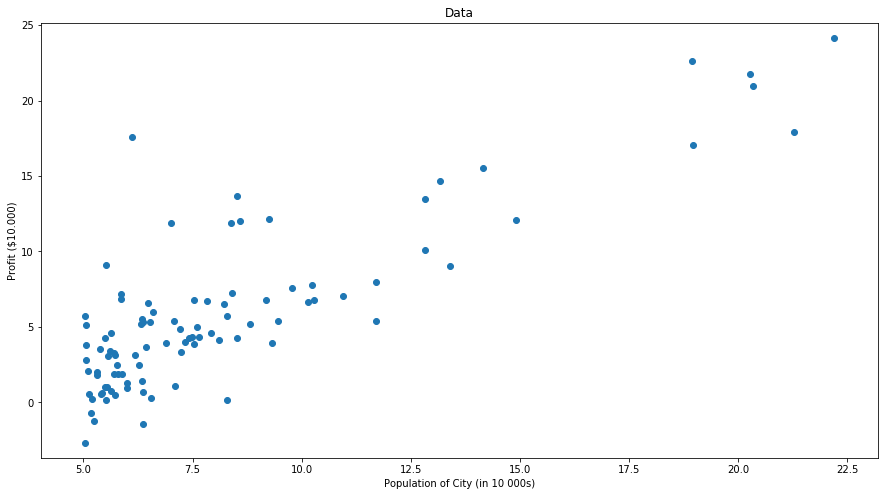

In [2]:
from lin_reg import LinRegression
import matplotlib.pyplot as plt
import numpy as np
import math

alpha = 0.2

reg = LinRegression()
reg.load_data()
reg.draw_data()
    

Hledáme přímku theta o rovnici: 

f(x) = C0 + C1*x 

Která nejlépe reprezentuje data => chyba, která vznikne součtem čtverců odchylek je nejmenší. 

    # funkce predikce hypotezy theta
    def predict_y(self, x, c0, c1):
        return c0 + x * c1
    
    
    # Funkce pro výpočet chyby
    def compute_error(self, c0, c1):
        sum_sq = 0
        for x, y in self.data:
            sum_sq += (self.predict_y(x, c0, c1) - y)**2

        return sum_sq/float(self.count*2)

Přímka theta generuje chybu v závislosti na 2 parametrech C1 a C0.  
Hledáme takovou kombinaci parametrů C0 a C1, kdy chyba je nejmenší.  
Začneme s libovolnými hodnotami parametrů tedy např. C0=0 a C1=0.  
Vypočítáme gradient v tomto bodě - tj. parciální derivace podle c0 a c1.  
Gradient je vektor, který má směr největšího růstu. Tento vektor ještě znormalizujeme, abychom měli čistě směr.  
Vydáme se opačným směrem, protože hledáme minimum.  

    # Funkce počítající gradient
    def compute_grad(self):
        c0_grad = 0
        c1_grad = 0
        for x, y in self.data:
            c0_grad -= self.predict_y(x, self.theta.c0, self.theta.c1) - y
            c1_grad -= x * (self.predict_y(x, self.theta.c0, self.theta.c1) - y)

        c0_grad = c0_grad / float(self.count)
        c1_grad = c1_grad / float(self.count)
        size = math.sqrt(c0_grad ** 2 + c1_grad ** 2)
        return c0_grad/size, c1_grad/size   # normalized

Tedy k výchozímu bodu přičteme opačnou hodnotu gradientu vynásobenou velikostí kroku alpha a znovu spočítáme chybu.


c0 = 0  
c1 = 0  
alpha = 0.2  
  
dx, dy = self.compute_grad()  
c0 += dx * alpha  
c1 += dy * alpha  
err = self.compute_error(c0, c1)  
  
Tento postup budeme opakovat v cyklu, dokud chyba bude klesat  
a dokud rozdíl mezi dvěmi po sobě následujícími chybami bude větší než požadovaná přesnost eta = 0.0001  
V situaci, kdy chyba se zvětší, tak krok neprovedu, ale místo toho zmenším krok na polovinu a pokračuji ve výpočtu.
Pro zvolenou přesnost eta = 0.0001 mi stačilo 543 iterací.


    def find_minimum(self, alpha=0.2, is_print=False):
        """
        using Gradient Descent
        """
        self.alpha = alpha
        err = self.compute_error(0, 0)
        self.errors.append(err)
        self.thetas.append((0, 0))
        if is_print:
            self.print_row(err)

        for i in range(2000):
            dx, dy = self.compute_grad()    # uses theta
            c0 = self.theta.c0
            c1 = self.theta.c1
            c0 += dx*self.alpha
            c1 += dy*self.alpha
            err = self.compute_error(c0, c1)

            if err < self.errors[-1]:
                # error is less
                if is_print:
                    self.print_row(err)

                if abs(err - self.errors[-1]) < 0.0001:
                    # STOP
                    break

                self.theta.update(c0, c1)
                self.errors.append(err)
                self.thetas.append((c0, c1))
                self.iteration += 1

            else:
                # error is higher
                # decrease step and repeat
                self.alpha = self.alpha * 0.5
                

In [3]:
from lin_reg import LinRegression
import numpy as np
    
alpha = 0.2
reg = LinRegression()
reg.load_data()
reg.find_minimum(alpha=alpha, is_print=True)
print("====================================================")
print(f"Regresni primka: y = {reg.theta.c1:0.2f}x + {reg.theta.c0:0.2f}")
print("====================================================")

                    

I:1 alpha: 0.2000  C0:0.00000, C1:0.00000, Error: 32.07273
I:1 alpha: 0.2000  C0:0.00000, C1:0.00000, Error: 20.59915
I:2 alpha: 0.2000  C0:0.01781, C1:0.19921, Error: 12.41390
I:3 alpha: 0.2000  C0:0.03488, C1:0.39848, Error: 7.51628
I:4 alpha: 0.2000  C0:0.05049, C1:0.59787, Error: 5.90281
I:5 alpha: 0.2000  C0:0.06168, C1:0.79755, Error: 5.84719
I:6 alpha: 0.0500  C0:-0.13654, C1:0.77087, Error: 5.76127
I:7 alpha: 0.0500  C0:-0.14078, C1:0.82069, Error: 5.74837
I:8 alpha: 0.0500  C0:-0.18621, C1:0.79980, Error: 5.74641
I:9 alpha: 0.0500  C0:-0.20002, C1:0.84785, Error: 5.72816
I:10 alpha: 0.0500  C0:-0.21967, C1:0.80187, Error: 5.72302
I:11 alpha: 0.0500  C0:-0.23236, C1:0.85023, Error: 5.70779
I:12 alpha: 0.0500  C0:-0.25234, C1:0.80440, Error: 5.70076
I:13 alpha: 0.0500  C0:-0.26436, C1:0.85293, Error: 5.68743
I:14 alpha: 0.0500  C0:-0.28449, C1:0.80717, Error: 5.67930
I:15 alpha: 0.0500  C0:-0.29607, C1:0.85581, Error: 5.66720
I:16 alpha: 0.0500  C0:-0.31626, C1:0.81006, Error: 5

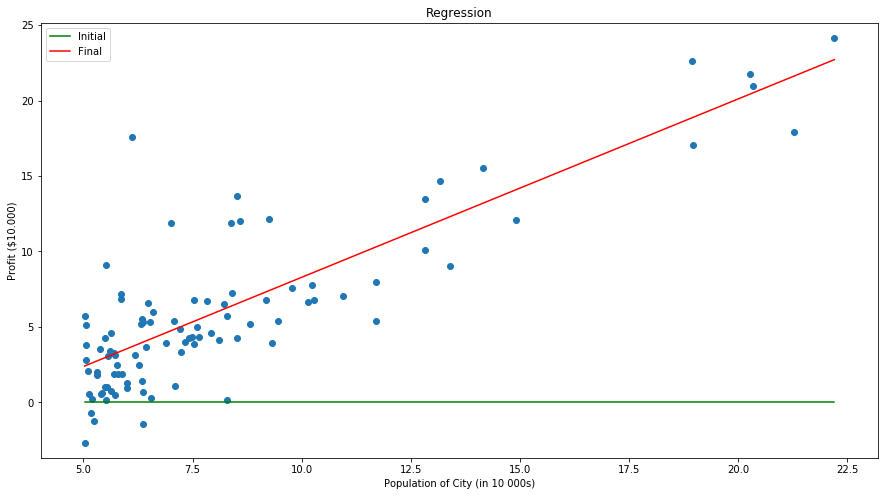

In [4]:
from lin_reg import LinRegression
import matplotlib.pyplot as plt
import numpy as np
import math


alpha = 0.2

reg = LinRegression()
reg.load_data()
reg.draw_data()
reg.find_minimum(alpha=alpha, is_print=False)
reg.draw_hypoteza()
plt.legend()
plt.show()

    

Bude zajímavé zobrazit parametry C0 a C1 - tedy kudy vede cesta klesání k minimu.

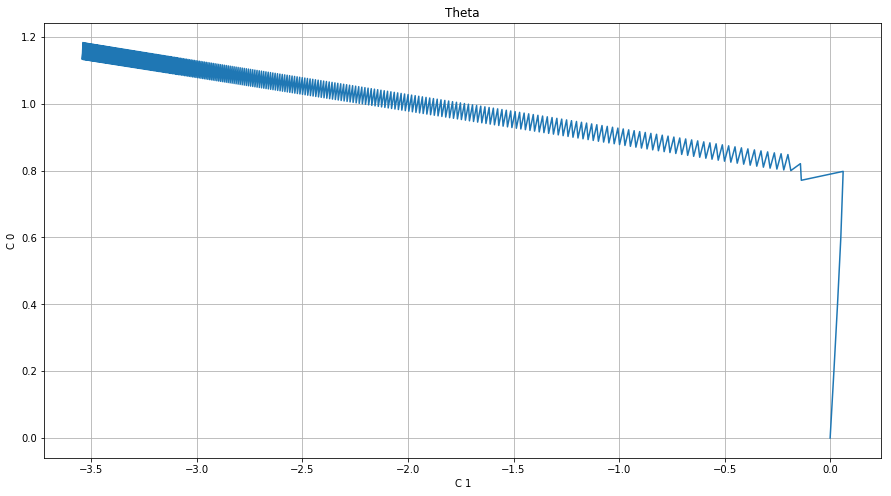

In [5]:
from lin_reg import LinRegression
import matplotlib.pyplot as plt
import numpy as np
import math


alpha = 0.2

reg = LinRegression()
reg.load_data()
reg.find_minimum(alpha=alpha, is_print=False)
reg.draw_theta()
plt.show()

Zde vidíme jak se měnila chyba.

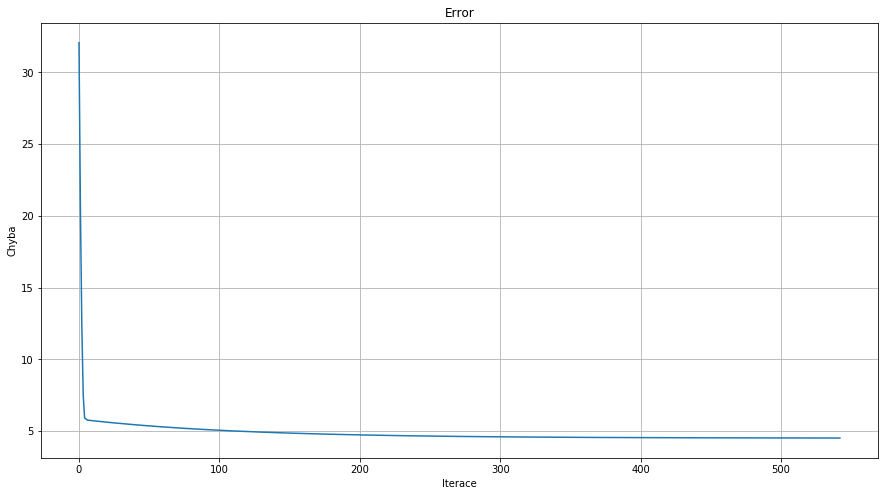

In [6]:
from lin_reg import LinRegression
import matplotlib.pyplot as plt
import numpy as np
import math


alpha = 0.2

reg = LinRegression()
reg.load_data()
reg.find_minimum(alpha=alpha, is_print=False)
reg.draw_error()
plt.show()

### Vypočtěme thetu z normálních rovnic.  
Hledáme polynom 1.stupně - přímku metodou nejmenších čtverců:  𝑦 = 𝑐1𝑥 + 𝑐0 

Plocha čtverců je $ S = \sum_{i=0}^n (y_i - (c_0 + c_1x_i))^2 $ a musí být minimální. 
Hledáme tedy minimum této kvadratické funkce.
Funkci zderivujeme podle parametrů:  𝑐0, 𝑐1 
a dostaneme soustavu 2 rovnic o 2 neznámích:

$$ c_0n + c_1\sum_{i=0}^n x_i= \sum_{i=0}^n y_i $$  
  
$$ c_0\sum_{i=0}^n x_i + c_1\sum_{i=0}^n x_i^2 = \sum_{i=0}^n x_iy_i $$
 
x a y jsou zadané hodnoty z datového souboru.


Normal Equations: c1=1.19303   c0=-3.89578 
Gradient Descent: c1=1.18239   c0=-3.53985 


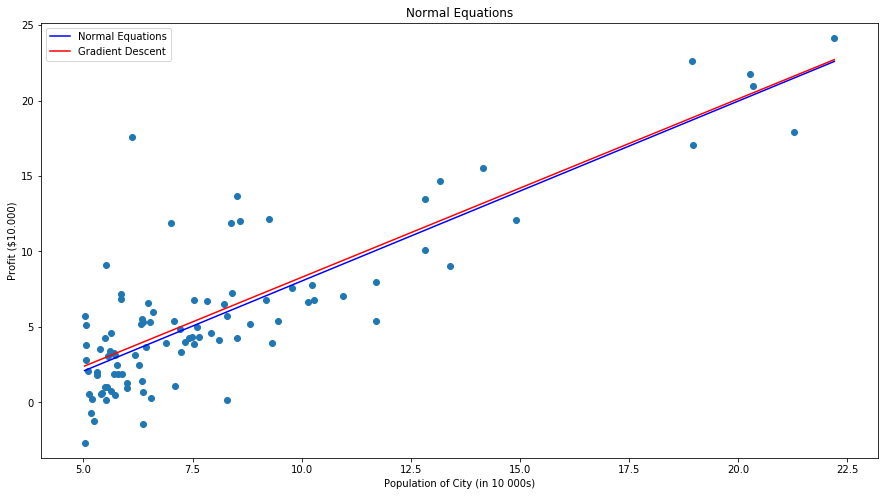

In [7]:
from lin_reg import LinRegression
import matplotlib.pyplot as plt
import numpy as np
import math


alpha = 0.2

reg = LinRegression()
reg.load_data()
reg.draw_data()
reg.find_minimum(alpha=alpha, is_print=False)
c = reg.compute_normal_eq()
reg.draw_normal_eq(c[0], c[1])
plt.legend()
plt.show()

Z grafu je vidět, že metoda gradientního descentu se blíží výsledkům, zjištěným pomocí normálních rovnic.  
Zdrojový kód třídy LinRegression je na githubu https://github.com/rjuppa/su/blob/master/lin_reg.py.